### Import Libraries and Mounte Drive

In [ ]:
import numpy as np
import cv2
import os
import keras
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
working_dir = '/content/drive/My Drive/Computer Vision Project/Datasets'

In [ ]:
cd '$working_dir'

/content/drive/My Drive/Computer Vision Project/Datasets


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt


### Load Data

In [ ]:
trainingData = './combined'

In [ ]:
##### Parameters for loading the data 
size = (64,64)
bach_size = 64 
test_split = 0.2

In [ ]:
def load_images(directory):
    images = []
    labels = []
    for idx, label in enumerate(categories):
        for file in os.listdir(directory + "/" + label):
            filepath = directory + "/" + label + "/" + file
            image = cv2.resize(cv2.imread(filepath), (64, 64))
            images.append(image)
            labels.append(idx)
    images = np.array(images)
    labels = np.array(labels)
    return(images, labels)

In [ ]:
categories = sorted(os.listdir(trainingData))

images, labels = load_images(directory = trainingData)

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(images, labels, test_size = 0.2, stratify = labels)

categories_size = len(categories)
train_len = len(xtrain)
test_len = len(xtest)

print("Total number of categories: ", categories_size)
print("Training images: " , train_len)
print("Testing images: ", test_len)


Total number of categories:  38
Training images:  96913
Testing images:  24229


## Data Information:



*   Traning Data - 96913 images
*   Testing Data - 24229 images
*   Number of Clasess - 38 Alphabet (a-z) , Numbers(0-9), space, delete.






## Data Visualization:
We will show one sample image from each class. The image data labeled by the name of its folder.


In [ ]:
%pylab inline
import sys

Populating the interactive namespace from numpy and matplotlib


C:\Users\harth\AppData\Roaming\Python\Python38\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['size']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## Training 


In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Flatten, Dense, Activation
from tensorflow.keras.layers import Convolution2D , MaxPool2D
from tensorflow.keras import backend as k
from tensorflow.keras import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
#shuffking and normlize the data
ytrain = keras.utils.to_categorical(ytrain)
ytest = keras.utils.to_categorical(ytest)
xtrain = xtrain.astype('float32')/255.0
xtest = xtest.astype('float32')/255.0

In [ ]:
#### Define layers in the CNN model####
aslmodel = Sequential()
# conv layer 1
aslmodel.add(Convolution2D(filters = 64, kernel_size = 5, padding = 'same', activation = 'relu',input_shape = (64, 64, 3)))
# conv layer 2
aslmodel.add(Convolution2D(filters = 64, kernel_size = 5, padding = 'same', activation = 'relu'))
# max pool layer 1
aslmodel.add(MaxPool2D(pool_size = (4, 4)))
# dropout requlrization  
aslmodel.add(Dropout(0.5))
# conv layer 3
aslmodel.add(Convolution2D(filters = 128 , kernel_size = 5, padding = 'same', activation = 'relu'))
# conv layer 4
aslmodel.add(Convolution2D(filters = 128 , kernel_size = 5, padding = 'same', activation = 'relu'))
# max pool layer 2
aslmodel.add(MaxPool2D(pool_size = (4, 4)))
# dropout requlrization
aslmodel.add(Dropout(0.5))
# conv layer 5
aslmodel.add(Convolution2D(filters = 256 , kernel_size = 5, padding = 'same', activation = 'relu'))
# dropout requlrization
aslmodel.add(Dropout(0.5))
# flatten the output of the previous layer 
aslmodel.add(Flatten())
# dense layer
aslmodel.add(Dense(38, activation='softmax'))

aslmodel.summary();


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        4864      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        102464    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       204928    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       409728    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 128)         0

In [ ]:
#### compile and fitting the model ####
aslmodel.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

hist = aslmodel.fit(xtrain,ytrain, epochs = 3, batch_size = 64)

Epoch 1/3
1515/1515 [==============================] - 2065s 1s/step - loss: 1.0252 - accuracy: 0.6768
Epoch 2/3
1515/1515 [==============================] - 2058s 1s/step - loss: 0.2851 - accuracy: 0.9086
Epoch 3/3
1515/1515 [==============================] - 2058s 1s/step - loss: 0.1910 - accuracy: 0.9415


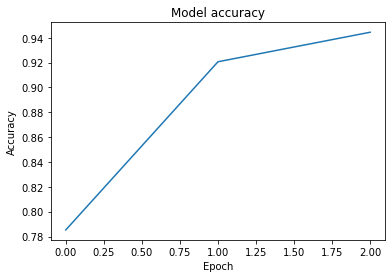

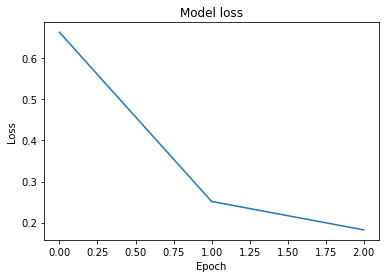

In [ ]:
plt.plot(hist.history['accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.show()

plt.plot(hist.history['loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
# serialize model to JSON
model_json = aslmodel.to_json()
with open("aslmodel2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
aslmodel.save_weights("aslmodel2.h5")
print("Saved aslmodel2 to disk")

Saved aslmodel2 to disk


In [ ]:
# load json and create model
json_file = open('aslmodel2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("aslmodel2.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
loaded_model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Test the model 

In [ ]:
Cost, accuracy = loaded_model.evaluate(xtest,ytest)

print("Cost = ",Cost,"\nAccuracy = ",accuracy)

758/758 [==============================] - 114s 150ms/step - loss: 0.0293 - accuracy: 0.9902
Cost =  0.029504554346203804 
Accuracy =  0.9900532364845276
